# Linear, polynomial and regressions in general

Regression machine learning problems, are those where the output values could be represented as continuous real numbers (instead of elements of a limited set). Those includes classic problems such as price prediction in respect to selected features, and son on. When we're modeling a problem with regression, we are trying to fins a hypothesis that best approximates our desired output value as function of the input values.

Linear regression hypothesis can be represented as:

\begin{equation}
\mathbf{h} = w_0 + w_1\mathbf{x_1} + w_2\mathbf{x_2} + \dots 
\end{equation}

While a polynomial regression could be written, for example, as:

\begin{equation}
\mathbf{h} = w_0 + w_1\mathbf{x_1} + w_2\mathbf{x_1^2} + w_3\mathbf{x_2} + w_4\mathbf{x_2^2} + \dots 
\end{equation}

And both, among several regression hypothesis, could be written in a more general form: As linear combinations of basis functions of the input features: 

\begin{equation}
\mathbf{h} = w_0\mathbf{\varphi_0}(x) + w_1\mathbf{\varphi_1}(x)+\dots+w_n\mathbf{\varphi_n}(x)=\sum_{i=1}^n w_i\mathbf{\varphi_i}(x)
\end{equation}

Where $\mathbf{\varphi_0}(x)$ stands for the bias function: $\mathbf{\varphi_0}(x)=1$

Which in matricial form, is written as:
\begin{equation}
\mathbf{h} = X \mathbf{w}
\end{equation}

The last expression is so interesting, because it can be interpreted as the hypothesis vector $\mathbf{h}$ being written in a different basis $X$, formed by the chosen basis functions.

\begin{equation}
   X =
  \left[ {\begin{array}{cc}
   \mathbf{\varphi_0}(x) & \mathbf{\varphi_1}(x) & \dots & \mathbf{\varphi_n}(x)
  \end{array} } \right]
\end{equation}

That being said, with a defined basis (linear, polynomial or any other family of functions), our job now is to find the hyphotesis $\mathbf{h}$ that best fits te expected output data $\mathbf{y}$

## Regression as a least squares problem

I think the best way to view regression as a least squares problem is to solve a simple, and silly, example with 3 data samples, just so we are able visualize the subspaces we are dealing with.
So ok, let's suppose we are solving the classic house price problem, and we're using only 3 data samples.

In [1]:
import numpy as np
y = np.array([250, 320, 600])
x = np.array([60, 120, 200])

We decide do perform to find a hypothesis with a simple linear regression. So hopefully what we wanted was to describe the ouput data as:

\begin{equation}
\mathbf{y} = w_0 + w_1 \mathbf{x}
\end{equation}

But sure enough, just by looking at that data, a line won't be able to fit all of those points.

<IPython.core.display.Javascript object>


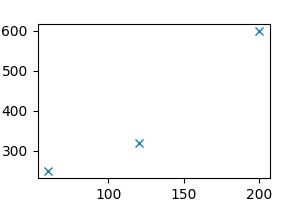

In [17]:
import matplotlib.pyplot as plt
%matplotlib notebook
f,ax = plt.subplots(figsize=(3,2))
ax.plot(x,y,'x')

And with that few number or samples we can visualize it on a linear algebra perspective! What we are trying to do is basically to write the vector $\mathbf{y}$ is respect of the basis $X$.

\begin{equation}
\mathbf{y}=X\mathbf{w}
\end{equation}


That problem that we just wrote doesn't have a solution, vector $\mathbf{y}$ is not in the subspace spanned by the basis $X$. This is confirmed when we plot $\mathbf{y}$ and the subspace spanned by basis $X$. We can clearly see it is not in the subspace.

In [9]:
xxx = np.zeros((3,2)); xxx[:,0]=1; xxx[:,1]=x;h = np.dot(xxx,np.linalg.solve(np.dot(xxx.T,xxx), np.dot(xxx.T,y)))

<IPython.core.display.Javascript object>


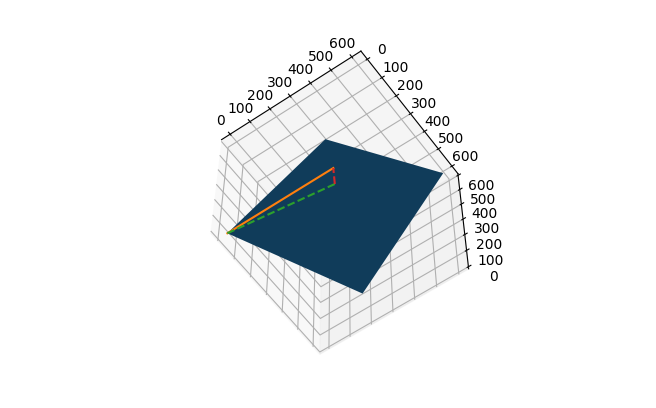

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx=[0,y[2]]
yy=[0,y[2]]
X,Y=np.meshgrid(xx,yy)
Z = X - (Y-X)/(x[1]-x[0])*x[0] + (Y-X)/(x[1]-x[0])*x[2]
ax.plot_surface(X,Y,Z)
ax.plot(*[[0,y[i]] for i in range(3)])
ax.plot(*[[0,h[i]] for i in range(3)],'--')
ax.plot(*[[h[i],y[i]] for i in range(3)],'--')
#ax.plot(*[[0,x[2]] for i in range(3)])
#ax.plot(*[[0,x[i]] for i in range(3)])
ax.set_zlim3d(0,600)
ax.set_aspect('equal')
plt.show()

As we have said earlier, our job is to find a hypothesis $\mathbf{h}$ that best fits the output value $\mathbf{y}$. Since we can't fit it exactly, we would like $\mathbf{h}$ with the minimal error. In linear algebra perspective, we want to find a vector h that is in the subspace X, and is as close to y as possible. Meaning the smallest $\mathbf{y}-\mathbf{h}$ vector possible. This clearly the projection of $\mathbf{y}$ in $X$, this is a least squares problem!

Prof. Strang has a nice section on his [book](http://math.mit.edu/~gs/linearalgebra/) about projection and least squares which we will follow here. One way to derive the least squares expression is to start by expressing the orthogonality between the vector $\mathbf{y-h}$ and the subspace $X$:
\begin{equation}
\begin{split}
&X^T(\mathbf{y}-\mathbf{h})=0\\
&X^T\mathbf{h}=X^T\mathbf{y}\\
\end{split}
\end{equation}

As we've defined: $\mathbf{h}=X\mathbf{w}$

\begin{equation}
\begin{split}
&X^TX\mathbf{w}=X^T\mathbf{y}\\
\end{split}
\end{equation}

Which is the famous least squares equation. Later on we will see how to get to that same equation using a different approach exactly same expression by solving minimization analytically which is a nice link between linear algebra and calculus.

Since $X$ has linear independent columns, we know that $X^TX$ has an inverse. So the expression above can be solved, and $\mathbf{h}$ can be easily computed:

<IPython.core.display.Javascript object>


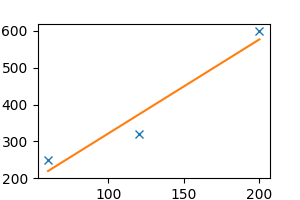

In [19]:
X = np.ones((3,2))
X[:,1] = x
h = np.dot(X,np.linalg.solve(np.dot(X.T,X),np.dot(X.T,y))) # h actal computation
f,ax = plt.subplots(figsize=(3,2))
ax.plot(x, y,'x')
ax.plot(x, h)

## Regression as an optimization problem